<a href="https://colab.research.google.com/github/Thomas26948/Autonomous-Driving/blob/main/detect_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inspiré du site : **
https://www.pyimagesearch.com/2015/11/09/pedestrian-detection-opencv/#pyi-pyimagesearch-plus-optin-modal


In [2]:
!pip install imutils

In [3]:
!pip install --upgrade imutils

Requirement already up-to-date: imutils in /usr/local/lib/python3.7/dist-packages (0.5.4)


In [ ]:
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow

In [ ]:
from google.colab.patches import cv2_imshow

[INFO] img_test.jpg: 2 original boxes, 2 after suppression


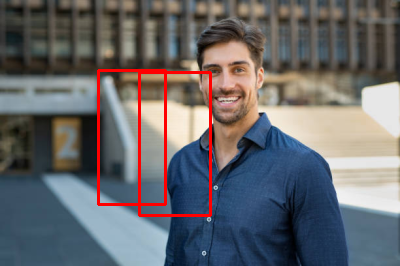

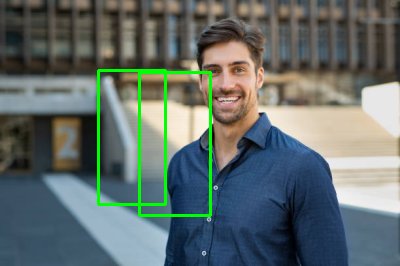

[INFO] piet.jpg: 4 original boxes, 3 after suppression


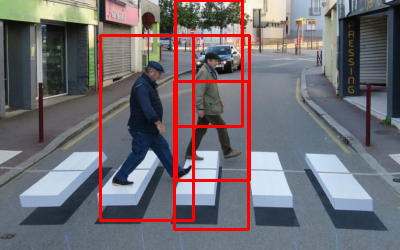

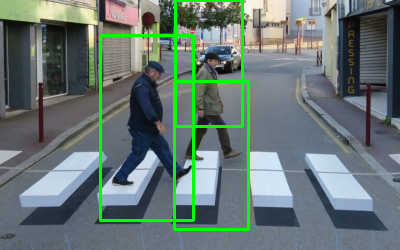

[INFO] piet3.jpg: 1 original boxes, 1 after suppression


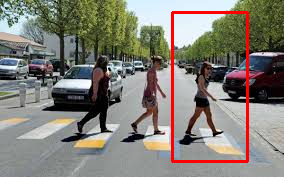

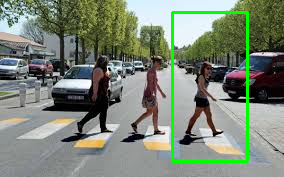

[INFO] piet2.jpg: 1 original boxes, 1 after suppression


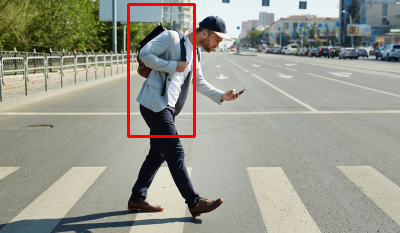

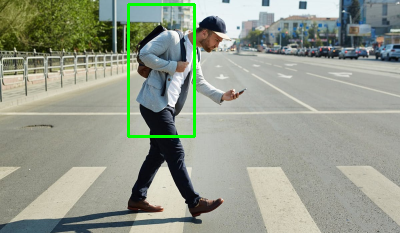

In [24]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--images", required=True, help="path to images directory")
# args = vars(ap.parse_args())

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# loop over the image paths
for imagePath in paths.list_images("/content/drive/MyDrive/PIE/images"):
	# load the image and resize it to (1) reduce detection time
	# and (2) improve detection accuracy
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=min(400, image.shape[1]))
	orig = image.copy()
	# detect people in the image
	(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),
		padding=(8, 8), scale=1.05)
	# draw the original bounding boxes
	for (x, y, w, h) in rects:
		cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
	# apply non-maxima suppression to the bounding boxes using a
	# fairly large overlap threshold to try to maintain overlapping
	# boxes that are still people
	rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
	pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
	# draw the final bounding boxes
	for (xA, yA, xB, yB) in pick:
		cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)
	# show some information on the number of bounding boxes
	filename = imagePath[imagePath.rfind("/") + 1:]
	print("[INFO] {}: {} original boxes, {} after suppression".format(
		filename, len(rects), len(pick)))
	# show the output images
	cv2_imshow(orig)
	cv2_imshow(image)
	cv2.waitKey(0)

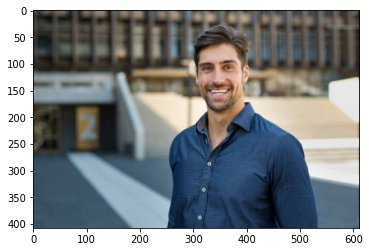

In [15]:
testim = mpimg.imread('/content/drive/MyDrive/PIE/images/img_test.jpg')
imshow(testim)